# **ELECTRIC VEHICLES SALES BY STATE IN INDIA**

# **Introduction**

This dataset pertains to the Electric Vehicle Sales by States in India over the past ten years and contains information for conducting various kinds of research and analysis on the sales pattern of Electric Vehicles. The dataset can be used in understanding and visualising the trends in the Electric Vehicles Market and discovering the reasons behind the trends. The dataset was collected from Clean Mobility Shift website and then thoroughly preprocessed to ensure assuracy and relevance.

# **Data Overview**

The dataset contains 8 colmuns and 96,845 rows. The rows consists of the following information: -

1. Year: - The year of the sales.
2. Month_Name: - The month in which sales occurred.
3. Date: - The specific date of the sales.
4. State: - The state in India where the sales occurred.
5. Vehicle Class: - The class of the vehicles (e.g. Sedan, SUV etc.)
6. Vehicle Category: - The category of the vehicle (e.g. commercial, passenger)
7. Vehicle Type: - The type of the vehocle (e.g. 2-wheeler, 4-wheeler)
8. EV Sales Quantity: - The quantity of EV sales.

The project is an attempt to analyse and highlight the different trends in the Electric Vehicles sales market over the past few years among different states and vehicle types and categories etc. To understand the data better, various kinds of graphs and tables have been used to visualise the data better and comprehend it relatively easily.

# **Problem Statement**

To analyse and predict the trends of the Electric Vehicles Sales by State in India using data analytics and machine learning tools.

# **Objectives**

1. To undrestand the dataset on the sales of electric vehicles.
2. To graphically analyse different trends in the dataset such as sales by states, sales by year and month, sales by vehicle type etc.
3. To draw inferences from the trends in the dataset.

# **Methodology**

The process of analysing the dataset would involve: -
1. Broad overview and cleaning of the data
2. Analysing and Visualizing the Electric Vehicle Sales Data based on:-
  1. Year-wise EV Sales Data
  2. Month-wise EV Sales Data
  3. State-wise EV Sales Data
  4. Vehicle Class-wise EV Sales Data
  5. Vehicle Type-wise EV Sales Data
  6. Vehicle Category-wise EV Sales Data
3. Predictive Analytics on Electric Vehicles Sales Data
  1. Segregating the features
  2. Modeling
  3. Model Evaluation and Graphical Analysis
4. Conclusion

# **Data Collection and Cleaning**

In [276]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [277]:
# 2. Importing the dataset
electric_vehicle_data = pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')

In [278]:
# 3. Callind the dataframe
electric_vehicle_data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [279]:
# 3. Finding the information regarding the Electric Vehicles dataset
electric_vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [280]:
# 5. Describing the EV Sales Quantity
electric_vehicle_data['EV_Sales_Quantity'].describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


In [281]:
# 4. Finding the shape of the Electric Vehicles dataset
print(f'Number of rows: {len(electric_vehicle_data.index)}, Number of columns: {len(electric_vehicle_data.columns)}, Number of missing values: {sum(electric_vehicle_data.isna().sum())}')

Number of rows: 96845, Number of columns: 8, Number of missing values: 0


In [282]:
# 5. Renaming the columns of the dataset
electric_vehicle_data.rename(columns = {'Year': 'year',
                                        'Month_Name': 'month_name',
                                        'Date': 'date',
                                        'State': 'state',
                                        'Vehicle_Class': 'vehicle_class',
                                        'Vehicle_Category': 'vehicle_category',
                                        'Vehicle_Type': 'vehicle_type',
                                        'EV_Sales_Quantity': 'ev_sales_quantity'
                                        }, inplace = True)

In [283]:
# Calling the dataset
electric_vehicle_data.head()

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [284]:
# 6. To find the number of missing values in the table
electric_vehicle_data.isna().sum()

,0
year,0
month_name,0
date,0
state,0
vehicle_class,0
vehicle_category,0
vehicle_type,0
ev_sales_quantity,0


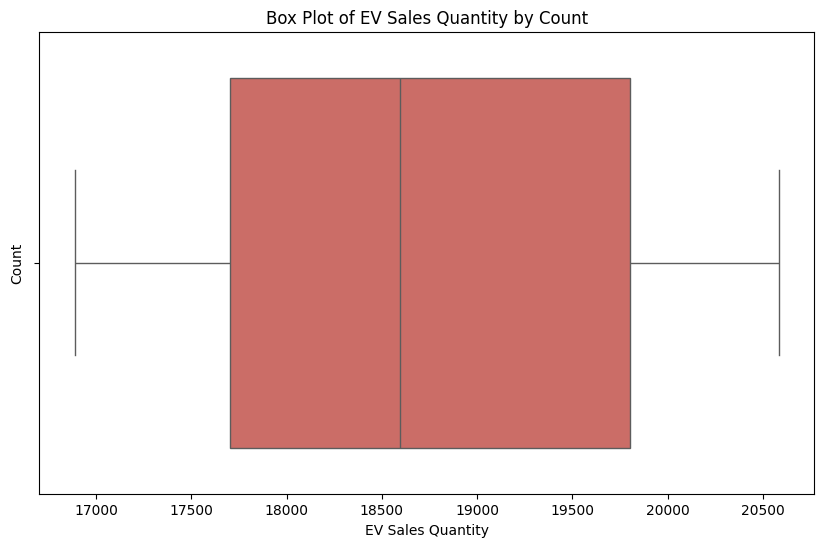

In [285]:
# 7. Plotting the EV Sales data with its count in a box plot diagram
plt.figure(figsize=(10, 6))
sns.boxplot(x='ev_sales_quantity',
            data=electric_vehicle_data.sort_values(by='ev_sales_quantity', ascending=False).head(10),
            palette='hls')
plt.title('Box Plot of EV Sales Quantity by Count')
plt.xlabel('EV Sales Quantity')
plt.ylabel('Count')
plt.show()

# **Analysing Electric Vehicle Sales Data**

# **Year-wise Sales Data**

In [286]:
# 8. Tabulate the year-wise sales of EVs
electric_vehicle_data.groupby('year')['ev_sales_quantity'].sum().reset_index()

,year,ev_sales_quantity
0,2014,2392
1,2015,7805
2,2016,49855
3,2017,87420
4,2018,130254
5,2019,166819
6,2020,124684
7,2021,331498
8,2022,1024723
9,2023,1525179


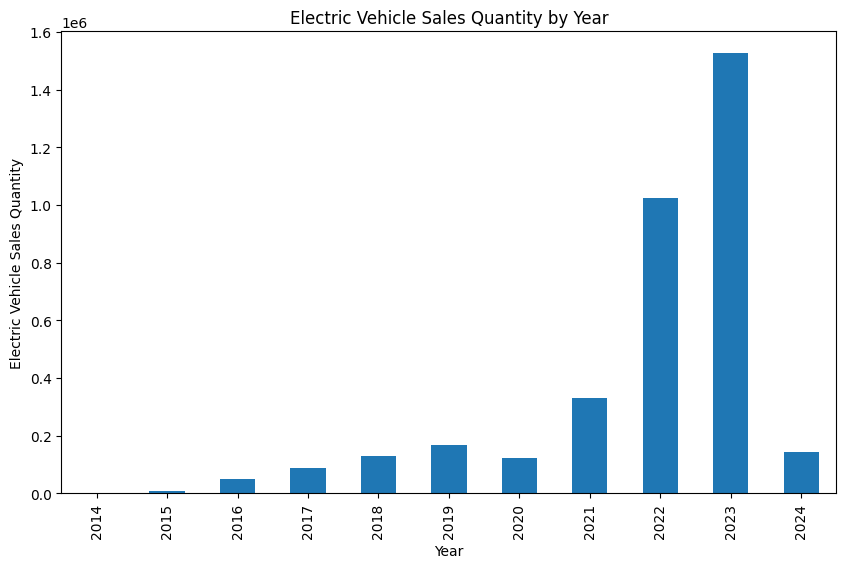

In [287]:
# 9. Plotting a Bar Diagram of the year-wise sales data
plt.figure(figsize = (10, 6))
electric_vehicle_data.groupby('year')['ev_sales_quantity'].sum().plot(kind = 'bar')
plt.xlabel("Year")
plt.ylabel('Electric Vehicle Sales Quantity')
plt.title('Electric Vehicle Sales Quantity by Year')
plt.show();

The graph above shows that the year 2023 recorded the highest sales of electric vehicles and the year 2014 recorded the lowest sales. The graph also reflect that the EV sales rose exponentially post Covid-19 pandemic period since 2021.

# **Month-wise Sales Data**

In [288]:
# 10. Tabulating the month-wise sales data
state_wise_month = electric_vehicle_data.groupby('month_name')['ev_sales_quantity'].sum().reset_index()
top_state_month = state_wise_month.sort_values(by = 'ev_sales_quantity', ascending = False)
top_state_month

,month_name,ev_sales_quantity
9,nov,382217
2,dec,364558
4,jan,360703
10,oct,355083
11,sep,313433
7,mar,299888
1,aug,294022
5,jul,270473
8,may,262747
0,apr,232194


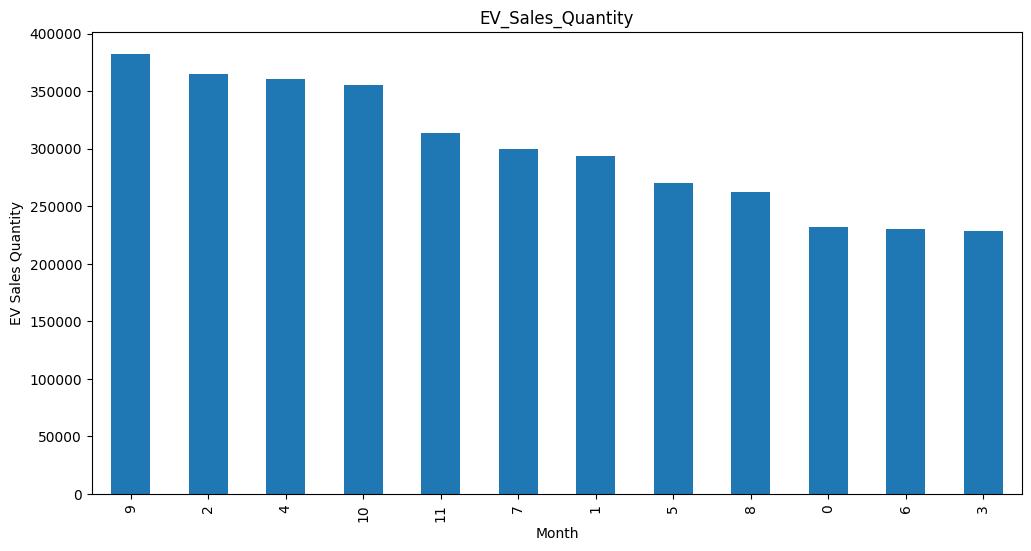

In [289]:
# 11. Plotting the Bar Diagram of the month-wise sales data of EVs
plt.figure(figsize = (12,6))
top_state_month['ev_sales_quantity'].plot(kind='bar',
                                          x='month_name',
                                          y='ev_sales_quantity',
                                          title='EV_Sales_Quantity')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.show();

Here one can notice that the EV sales rose especially in the month of November and was the lowest in the month of February over the year.

# **State-wise Sales Data**

In [290]:
# 12. Tabulating the state-wise sales data
state_wise_sales = electric_vehicle_data.groupby('state')['ev_sales_quantity'].sum().reset_index()
top_state_sales = state_wise_sales.sort_values(by = 'ev_sales_quantity', ascending = False)
top_state_sales

,state,ev_sales_quantity
31,Uttar Pradesh,732074
19,Maharashtra,401535
15,Karnataka,315498
8,Delhi,268538
27,Rajasthan,228573
4,Bihar,213465
29,Tamil Nadu,206902
10,Gujarat,176713
3,Assam,151917
16,Kerala,133246


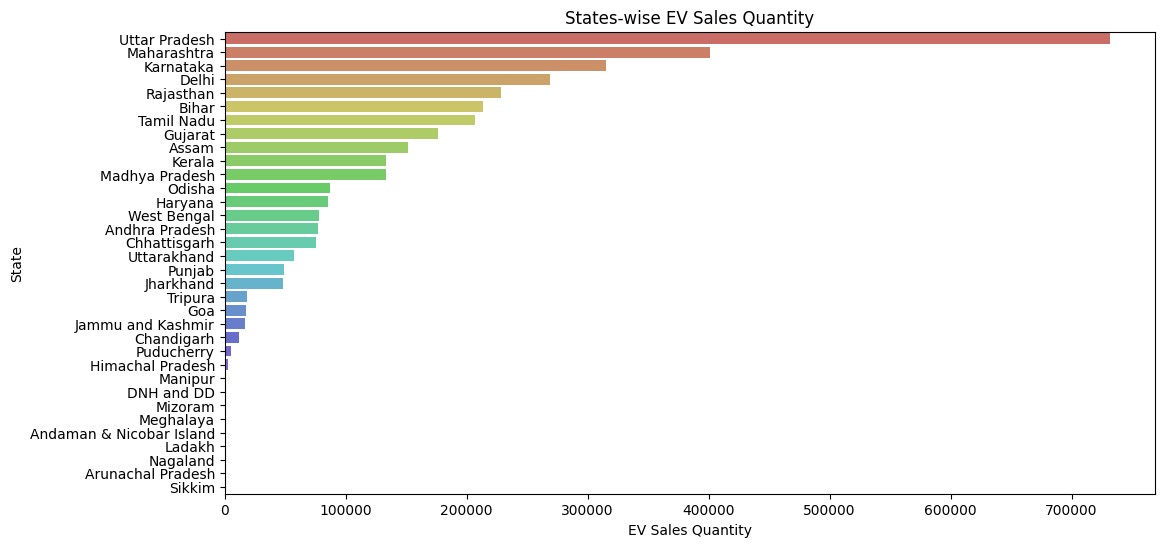

In [291]:
# 13. Plotting the graph of the state-wise sales data
plt.figure(figsize = (12,6))
sns.barplot(x='ev_sales_quantity',
            y='state',
            data=top_state_sales,
            palette='hls')
plt.xlabel('EV Sales Quantity')
plt.ylabel('State')
plt.title('States-wise EV Sales Quantity')
plt.show()

The graph above shows that the highest sales were recorded in the state of Uttar Pradesh and the lowest sales were recorded in the state of Sikkim.

In [292]:
# 14. Tabulating top 10 states with EV sales quantity
state_wise_sales = electric_vehicle_data.groupby('state')['ev_sales_quantity'].sum().reset_index()
top_state_sales = state_wise_sales.sort_values(by = 'ev_sales_quantity', ascending = False)
top_state_sales.head(10)

,state,ev_sales_quantity
31,Uttar Pradesh,732074
19,Maharashtra,401535
15,Karnataka,315498
8,Delhi,268538
27,Rajasthan,228573
4,Bihar,213465
29,Tamil Nadu,206902
10,Gujarat,176713
3,Assam,151917
16,Kerala,133246


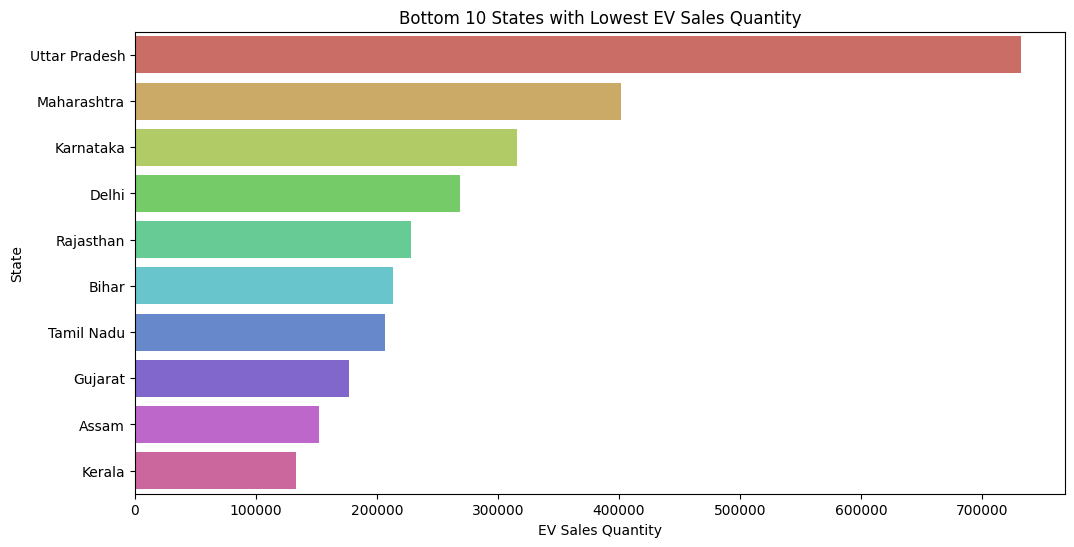

In [293]:
# 15. Plotting States with highest sales quantity
plt.figure(figsize = (12,6))
sns.barplot(x='ev_sales_quantity',
            y='state',
            data=top_state_sales.head(10),
            palette='hls')
plt.xlabel('EV Sales Quantity')
plt.ylabel('State')
plt.title('Bottom 10 States with Lowest EV Sales Quantity')
plt.show();

In [294]:
# 16. Tabulating states with least sales quantity
top_state_sales.tail(10)

,state,ev_sales_quantity
12,Himachal Pradesh,2886
20,Manipur,1284
7,DNH and DD,431
22,Mizoram,235
21,Meghalaya,208
0,Andaman & Nicobar Island,202
17,Ladakh,88
23,Nagaland,52
2,Arunachal Pradesh,40
28,Sikkim,4


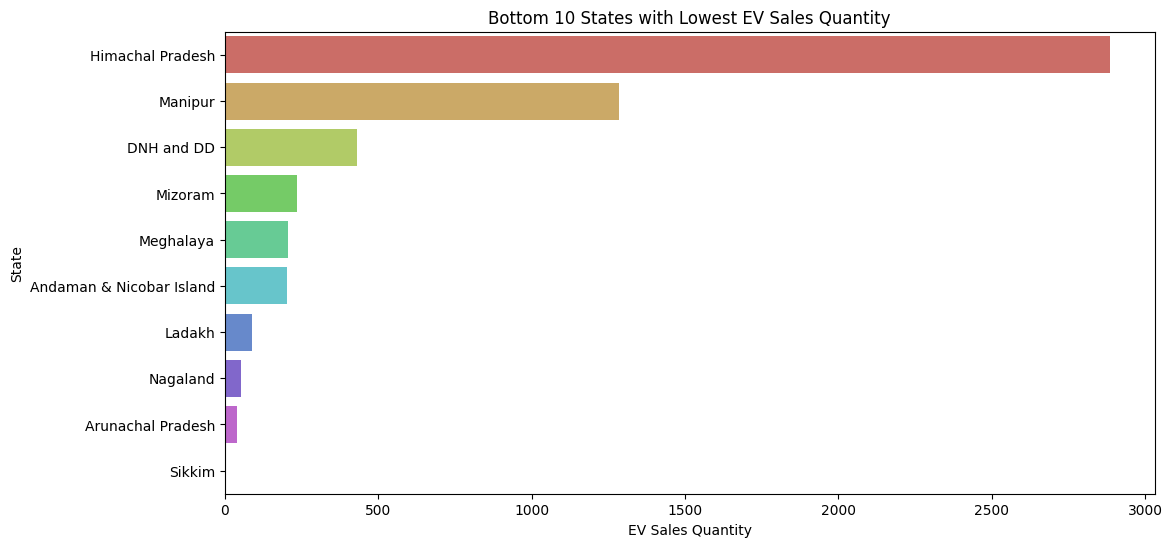

In [295]:
# 17. Plotting States with least sales quantity
plt.figure(figsize = (12,6))
sns.barplot(x='ev_sales_quantity',
            y='state',
            data=top_state_sales.tail(10),
            palette='hls')
plt.xlabel('EV Sales Quantity')
plt.ylabel('State')
plt.title('Bottom 10 States with Lowest EV Sales Quantity')
plt.show();

In [296]:
# 18. Tabulating Year-Wise Sales data for all states
stateXsales_data = electric_vehicle_data.groupby(['year', 'state'])['ev_sales_quantity'].sum().reset_index()
stateXsales_data

,year,state,ev_sales_quantity
0,2014,Andaman & Nicobar Island,0
1,2014,Andhra Pradesh,12
2,2014,Arunachal Pradesh,0
3,2014,Assam,2
4,2014,Bihar,12
...,...,...,...
369,2024,Tamil Nadu,8715
370,2024,Tripura,507
371,2024,Uttar Pradesh,27833
372,2024,Uttarakhand,1234


# **Cross Tabulating State and Year wise data on Electric Vehicle Sales**

In [297]:
# 19. Rearranging the years as rows and states as columns for ev sales data
yearXstate_data = stateXsales_data.pivot(index = 'year', columns = 'state', values = 'ev_sales_quantity')
yearXstate_data

state,Andaman & Nicobar Island,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,DNH and DD,Delhi,Goa,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
year,,,,,,,,,,,,,,,,,,,,,
2014,0,12,0,2,12,0,123,0,48,9,...,51,3,30,87,1,196,0,139,9,2
2015,0,8,0,23,69,2,86,2,3565,4,...,47,11,19,676,2,86,0,1012,14,31
2016,0,20,1,19,1100,1,192,2,21688,34,...,25,7,38,3996,1,86,0,15310,1158,1529
2017,0,0,0,3833,3593,23,945,1,18042,39,...,212,9,139,3945,0,118,2,40649,4225,4455
2018,20,1165,1,7403,8469,213,1902,19,20961,26,...,1358,87,363,4678,0,1332,32,53212,5070,6728
2019,2,2123,1,10867,12380,506,2744,19,23222,41,...,1159,80,961,6633,0,3444,1459,55796,5819,13533
2020,36,1623,5,8357,12447,369,1489,24,12378,80,...,904,88,832,5603,0,5698,3421,31264,2398,10079
2021,92,9540,2,15633,23082,734,4214,29,25815,1095,...,5627,405,4643,23462,0,30030,2435,66702,5324,6408
2022,23,29006,2,40720,55752,2719,22363,140,62265,5686,...,28444,1481,14054,78240,0,66955,4178,162857,15561,11142


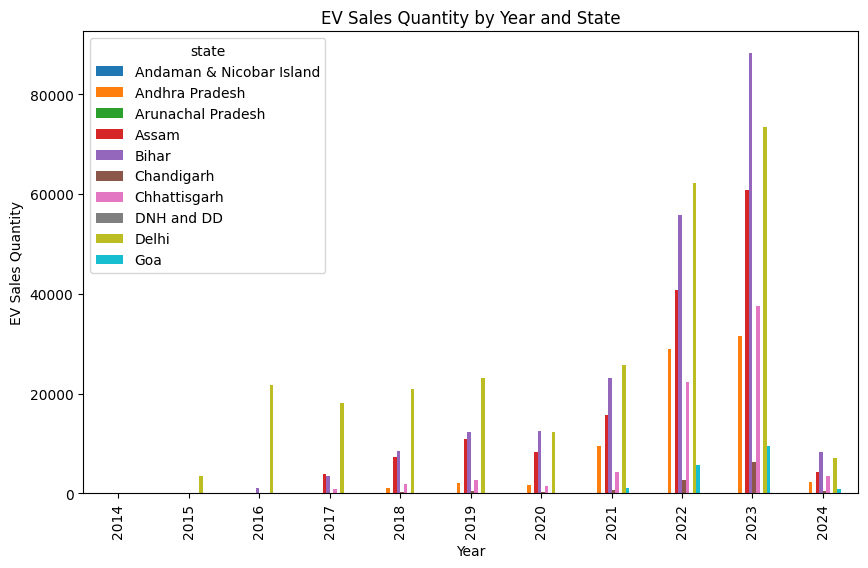

In [298]:
# 20. Plotting the first 10 state with year-wise sales data from the table above
yearXstate_data.iloc[:, :10].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.title('EV Sales Quantity by Year and State')
plt.show()

The above diagram shows that the year 2023 recorded the highest sales if Electric Vehicles amongst all the states and Bihar ranked one of the states with the highest sales of Electric Vehicles.

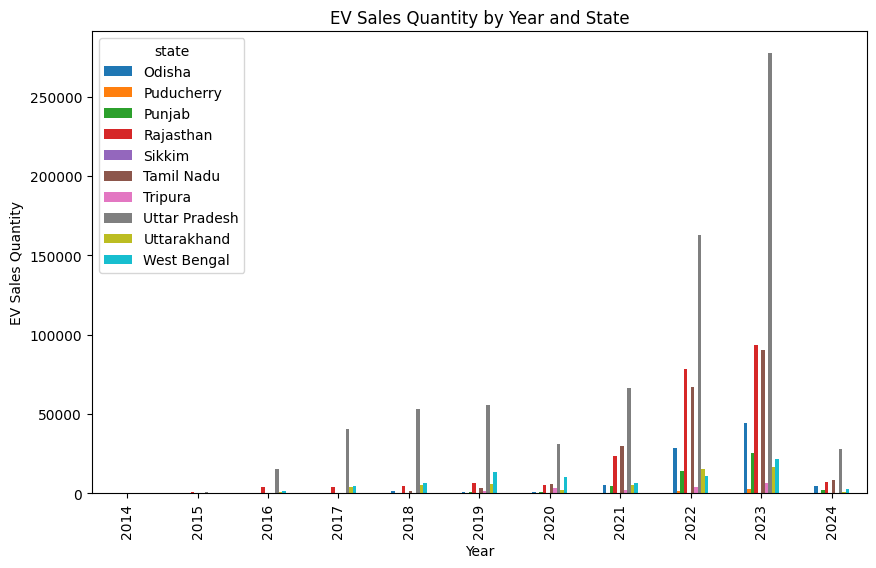

In [299]:
# 21. Plotting the last 10 state with year-wise sales data from the table above
yearXstate_data.iloc[:, -10:].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.title('EV Sales Quantity by Year and State')
plt.show()

The above diagram shows how the year 2023 had the highest slaes of Electric vehicles and Uttar Pradesh accounted for the highest amounts of sales.

# **Vehicles Class wise Sales Data**

In [300]:
# 22. To find the count of various vehicle classes
electric_vehicle_data['vehicle_class'].value_counts().head(10)

,count
vehicle_class,
MOTOR CAR,4111
M-CYCLE/SCOOTER,4101
GOODS CARRIER,4096
MOTOR CAB,3985
BUS,3813
THREE WHEELER (PASSENGER),3786
MAXI CAB,3684
MOPED,3399
AMBULANCE,3393


In [301]:
# 23. Tabulate the top 10 Vehicle Class along with EV sales data
class_sales_data = electric_vehicle_data.groupby('vehicle_class')['ev_sales_quantity'].sum().reset_index()
top_class_sales = class_sales_data.sort_values(by = 'ev_sales_quantity', ascending = False)
top_class_sales.head(10)

,vehicle_class,ev_sales_quantity
31,M-CYCLE/SCOOTER,1697373
18,E-RICKSHAW(P),1408127
40,MOTOR CAR,130676
17,E-RICKSHAW WITH CART (G),90656
59,THREE WHEELER (PASSENGER),76132
38,MOPED,61253
58,THREE WHEELER (GOODS),44974
45,MOTORISED CYCLE (CC > 25CC),36390
39,MOTOR CAB,18681
43,MOTOR CYCLE/SCOOTER-USED FOR HIRE,11765


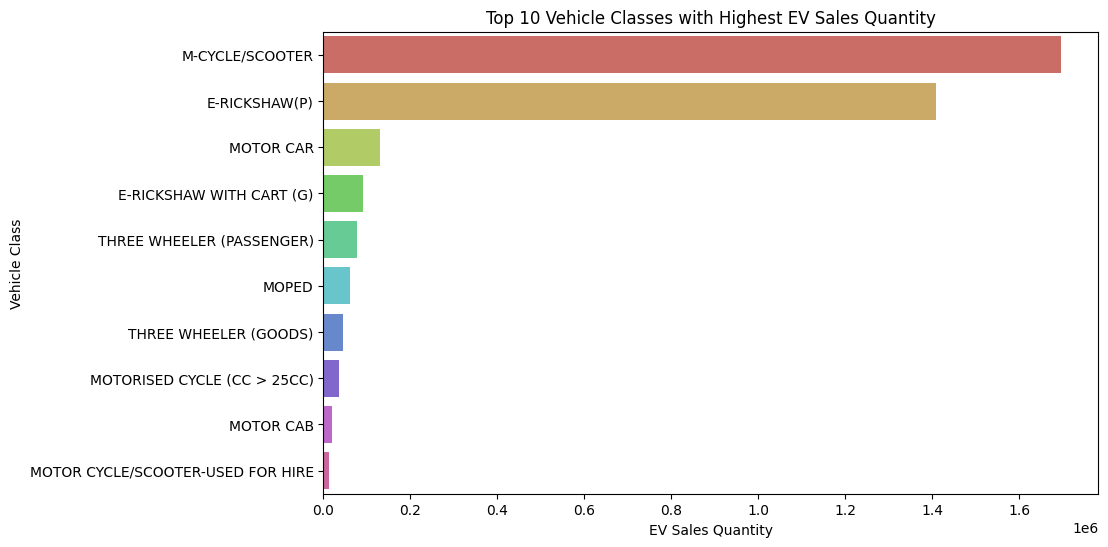

In [302]:
# 24. Plotting the Bar Graph of the top 10 vehicle class and ev sales data
plt.figure(figsize=(10,6))
sns.barplot(x='ev_sales_quantity',
            y='vehicle_class',
            data=top_class_sales.head(10),
            palette='hls')
plt.xlabel('EV Sales Quantity')
plt.ylabel('Vehicle Class')
plt.title('Top 10 Vehicle Classes with Highest EV Sales Quantity')
plt.show()

Here the vehicle class with the highest sales amongst the top 10 vehicles is M-Cycle or Scooter and the vehicle class with relatively lowest sales amongst the top 10 classes is Motor Cycle or Scooter used for hire.

# **Vehicle Type and Sales Data**

In [303]:
# 25. Tabulating the number of vehicle type along with their counts
electric_vehicle_data['vehicle_type'].value_counts()

,count
vehicle_type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


In [304]:
# 26. Tabulating Vehicle Type and EV Sales Quantity
type_sales_data = electric_vehicle_data.groupby('vehicle_type')['ev_sales_quantity'].sum().reset_index()
type_sales_data

,vehicle_type,ev_sales_quantity
0,2W_Personal,1796340
1,2W_Shared,11765
2,3W_Goods,44974
3,3W_Goods_LowSpeed,90656
4,3W_Personal,421
5,3W_Shared,76132
6,3W_Shared_LowSpeed,1408127
7,4W_Personal,130676
8,4W_Shared,19099
9,Bus,7009


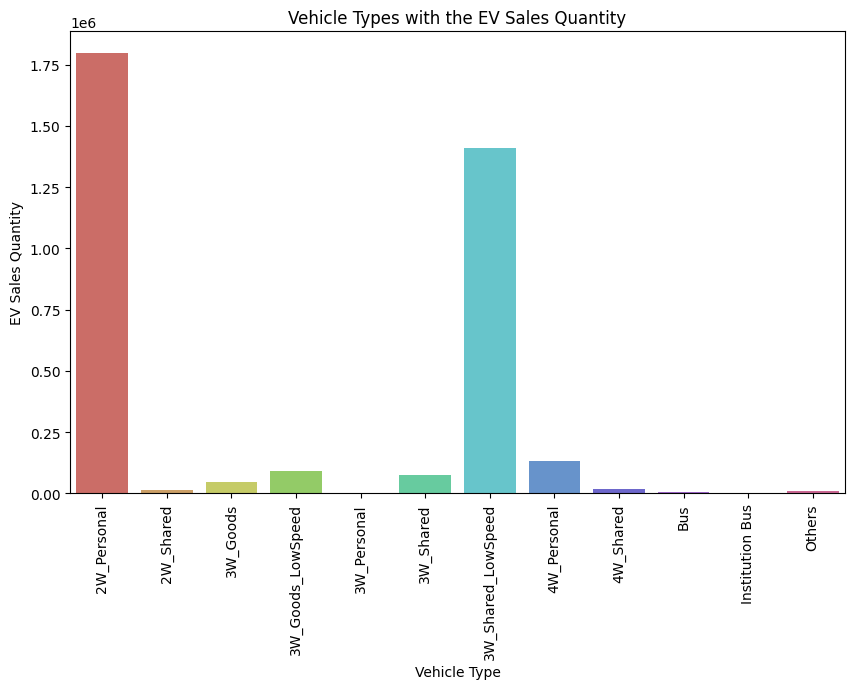

In [305]:
# 27. Plotting the Vehicle Type and EV Sales Quantity
plt.figure(figsize=(10,6))
sns.barplot(x='vehicle_type',
            y='ev_sales_quantity',
            data=type_sales_data,
            palette='hls')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales Quantity')
plt.title('Vehicle Types with the EV Sales Quantity')
plt.xticks(rotation=90)
plt.show();

The above diagram shows that the vehicle 2W Personal accounted for the highest sales amongst all the vehicle types and the second highest sales was attained by 3W Shared Low Speed Vehicle, while the vehicle type with the lowest sales was Insitution Bus.

# **Vehicle Category and Sales Data**

In [306]:
# 28. To find the count of each vehicle category
electric_vehicle_data['vehicle_category'].value_counts()

,count
vehicle_category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


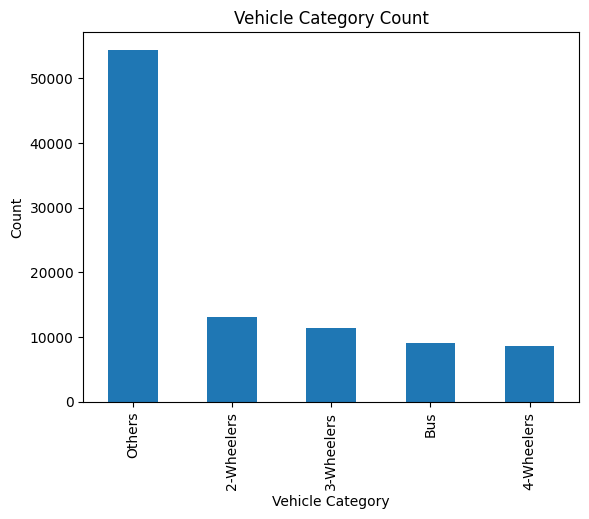

In [307]:
# 29. Plotting the vehicle category with counts in a bar diagram
electric_vehicle_data['vehicle_category'].value_counts().plot(kind = 'bar')
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.title('Vehicle Category Count')
plt.show();

Here the vehicle category others has the highest number of counts amongst various states and years.

In [308]:
# 30. Tabulating the Vehicle Category with EV Sales data
category_sales_data = electric_vehicle_data.groupby('vehicle_category')['ev_sales_quantity'].sum().reset_index()
category_sales_data

,vehicle_category,ev_sales_quantity
0,2-Wheelers,1808105
1,3-Wheelers,1620310
2,4-Wheelers,149775
3,Bus,7009
4,Others,8612


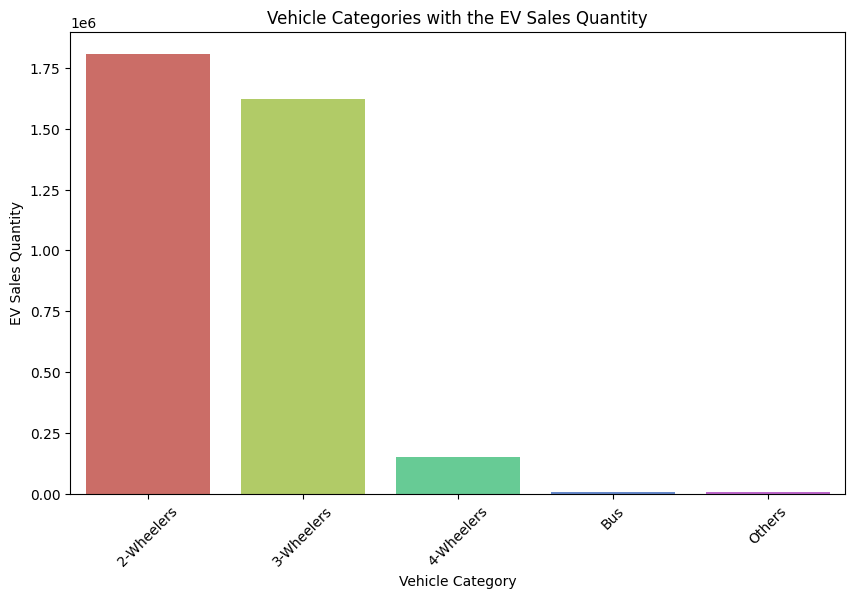

In [309]:
# 31. Plotting the Vehicle Category wise sales data
plt.figure(figsize=(10,6))
sns.barplot(x='vehicle_category',
            y='ev_sales_quantity',
            data=category_sales_data,
            palette='hls')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.title('Vehicle Categories with the EV Sales Quantity')
plt.xticks(rotation=45)
plt.show();

The Vehicle Category that received the highest amount of Sales was 2-wheeler and the vehicle categories that received the lowest sales amount are bus and others.

# **Cross Tabulating Year and Vehicle Category-wise Sales Data**

In [310]:
# 32. Tabulating the year-wise Vehicle Category data on EV Sales
yearXsales_data = electric_vehicle_data.groupby(['year', 'vehicle_category'])['ev_sales_quantity'].sum().reset_index()
yearXsales_data

,year,vehicle_category,ev_sales_quantity
0,2014,2-Wheelers,1679
1,2014,3-Wheelers,12
2,2014,4-Wheelers,498
3,2014,Bus,3
4,2014,Others,200
5,2015,2-Wheelers,1447
6,2015,3-Wheelers,5440
7,2015,4-Wheelers,761
8,2015,Bus,4
9,2015,Others,153


In [311]:
# 33. Cross tabulating the Vehicle Category and Year data along with the sales data
yearXcategory_data = yearXsales_data.pivot(index = 'year',
                                           columns = 'vehicle_category',
                                           values = 'ev_sales_quantity')
yearXcategory_data

vehicle_category,2-Wheelers,3-Wheelers,4-Wheelers,Bus,Others
year,,,,,
2014,1679,12,498,3,200
2015,1447,5440,761,4,153
2016,1460,47352,692,5,346
2017,1528,83530,1108,17,1237
2018,17059,110451,1588,49,1107
2019,30357,134168,1666,506,122
2020,29110,91236,4201,88,49
2021,156196,159909,13002,1177,1214
2022,631090,352742,38170,1988,733


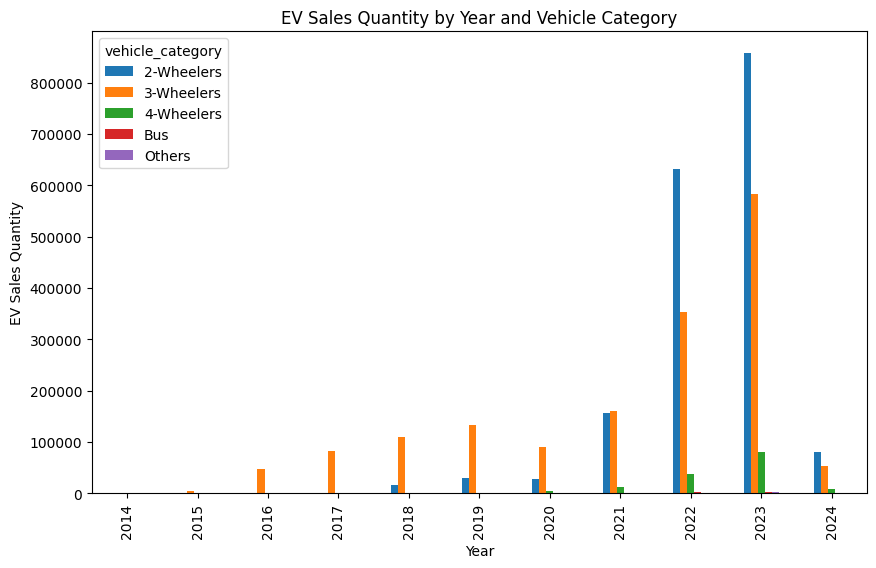

In [312]:
# 34. Plotting the Vehicle Category data in a Bar Diagram based on Year-wise sales data
yearXcategory_data.plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.title('EV Sales Quantity by Year and Vehicle Category')
plt.show()

It is evident from the above figure that the year 2023 accounted for the highest amounts of sales amongst all vehicle categories and the vehicle category that attained the highest sale in the year 2023 is 2-wheeler. The year 2014 had the lowest sales amount amongst all the vehicle categories. The sales number has dipped quite a bit in the year 2024 amongst all the vehicle categories, however, since the data is incomplete and does not encapsulate the entire of the year data, hence no final conclusion can be drawn on the 2024 sales data.


# **Predictive Analytics on Electric Vehicle Sales Data**

In [313]:
# 35. Importing Seaborn Library
import seaborn as sns

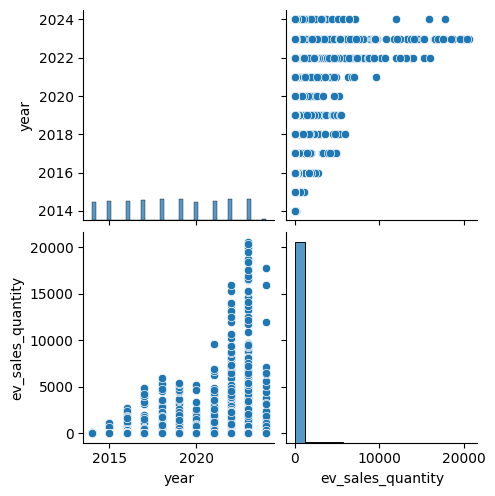

In [314]:
# 36. Plotting a pair plot diagram of year-wise EV Sales Data
sns.pairplot(electric_vehicle_data);

In order to perform predictive analystics on the Electric Vehicle Sales Dataset, we need to first convert the string variables in numeric data types.

In [315]:
# 37. Converting the Date from String to Datetime
import datetime

In [316]:
# 38. Separating the year, month and day from date column
electric_vehicle_data['date'] = pd.to_datetime(electric_vehicle_data['date'])
electric_vehicle_data['year'] = electric_vehicle_data['date'].dt.year
electric_vehicle_data['month'] = electric_vehicle_data['date'].dt.month
electric_vehicle_data['day'] = electric_vehicle_data['date'].dt.day

In [317]:
# Calling the Dataset
electric_vehicle_data.head()

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity,month,day
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,1,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,1,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0,1,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,1,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0,1,1


In [318]:
# 39. Encoding the Categorical Variables using one-hot encoding
electric_vehicle_data_encoded = pd.get_dummies(electric_vehicle_data,
                                               columns = ['state', 'vehicle_class', 'vehicle_type', 'vehicle_category'],
                                               drop_first = False)

In [319]:
# 40. Dropping the Date and Month_Name variables from the table
electric_vehicle_data_encoded.drop(['date', 'month_name'], axis = 1, inplace = True)

In [320]:
electric_vehicle_data_encoded.head()

,year,ev_sales_quantity,month,day,state_Andaman & Nicobar Island,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chandigarh,...,vehicle_type_4W_Personal,vehicle_type_4W_Shared,vehicle_type_Bus,vehicle_type_Institution Bus,vehicle_type_Others,vehicle_category_2-Wheelers,vehicle_category_3-Wheelers,vehicle_category_4-Wheelers,vehicle_category_Bus,vehicle_category_Others
0,2014,0,1,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2014,0,1,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2014,0,1,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2014,0,1,1,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2014,0,1,1,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [321]:
# To find the data types of the columns
electric_vehicle_data_encoded.dtypes

,0
year,int32
ev_sales_quantity,int64
month,int32
day,int32
state_Andaman & Nicobar Island,bool
...,...
vehicle_category_2-Wheelers,bool
vehicle_category_3-Wheelers,bool
vehicle_category_4-Wheelers,bool
vehicle_category_Bus,bool


# **Using Regression Model**

In [322]:
# 41. Importing Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [323]:
# 42. Separating the Independent Variables (X) and the Dependent Variable (y)
X = electric_vehicle_data_encoded.drop('ev_sales_quantity', axis=1)
y = electric_vehicle_data_encoded['ev_sales_quantity']

In [324]:
# 43. Split the variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [325]:
# 44. Instantiate the Model
model = RandomForestRegressor(n_estimators=100,
random_state=42)

In [326]:
# 45. Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [327]:
# 46. Make predictions on the model
y_pred = model.predict(X_test)

In [328]:
# 47. Calling the y prediction variable
y_pred

array([  0.  ,   0.  ,   0.  , ...,   0.  , 192.46,   0.  ])

In [329]:
# 48. Calling the model
model

RandomForestRegressor(random_state=42)

In [330]:
# 49. Finding the Mean Squared Error and Root Mean Squared Error from the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [331]:
# 50. Checking the mse and rmse of the predicted model
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 17038.402739645826
Root Mean Squared Error: 130.53123281286292


Here the Mean Squared Error is quite a large value 17038.41 and ideally a value closer to zero reflects that the prediction is closer to the actual value. Mean Squared Error quantifies the average squared variance between observed and predicted values. When there are no errors in a model, the MSE equals 0. A model's worth increases in proportion to the degree of error it contains.

Similarly, Root Mean Squared Error shows the quantum of deviation of the predicted values from the actual values and reflects the accuracy of the model in predicting the actual values. Here it is 130.54, which indicates that the predicted model does not reflect a accurate picture of the actual model.

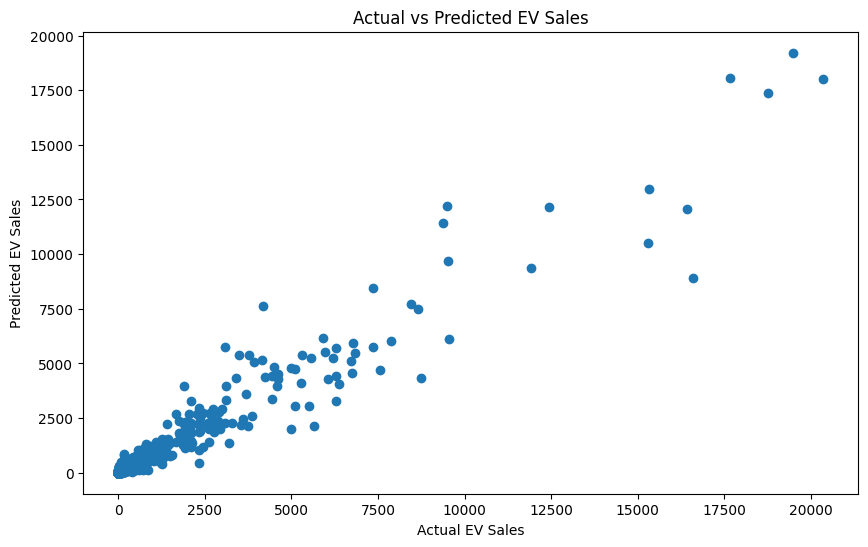

In [332]:
# 51. Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

Here in the diagram one could see that the Actual EV Sales data and the predicted EV Sales data have high concentration in the lower sales data. However, it gets scattered as the Actual EV Sales data keeps rising and the deviations also increases between the actual and the predicted model.

# **Conclusion**

We have attempted here to comprehend and analyse the dataset on the Sales of Electric Vehicles by States in India over the years. The EV Sales data has been given from the year 2014 to 2024 for the Indian states along with date, vehicle class, types and categories.

The use of wide-ranging data visualisation and analysis tools like tables, graphs, charts etc. have revealed that the 2023 recorded the highest sales compared to other years for all the states, vehicle classes, types and categories etc. One could infer the reason for this to be governmental and non-governmental push for Electrical Vehicle usage that was supported by the reduced EV prices especially of the Indian brands and the continuous activism of international groups for climate change and the hightened crude oil prices in the market.

The state which recorded the highest amounts of Electric Vehicle Sales across all the years amongst all the states has been Uttar Pradesh and the state with the lowest sales registered has been Sikkim.

The vehicle class that registered the highest sales has been motor cycles/ scooters and especially the two-wheeler personal type, the reason being its affordability and convenience factors. This is also reflected in the sales of Vehicle Categoreies wherein two-wheeler registered the highest sales.

The prediction of Electric Vehicle sales shows an root mean squared error of 130 approximately which is quite large and does not reflect the true picture of the actual model. The graph of the predicted vs actual sales values also shows this fact wherein as the sales values increase the deviations keeps rising.

On the whole, the analysis gives important and valuable insights about the trend in the Electrical Vehicle Market and helps us make informed and well thought-out decisions about the future.